In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#import seaborn as sns

from datetime import datetime
from datetime import timezone

# Data uploading

In [2]:
filename = "all_lat_lon_2022_08_01.csv"
ground_departures_df = pd.read_csv(filename, sep=' ')
ground_departures_df = ground_departures_df.dropna()
ground_departures_df.set_index(['callsign'], inplace = True, drop=True)

In [3]:
from traffic.data import airports

In [4]:
import pickle
import traffic
 
with open('traffic_object_2022_08_01', 'rb') as traffic_object_file:
 
    ground_flights = pickle.load(traffic_object_file)

In [5]:
def make_TMA_plot():
    
    TMA_lon=[18.2130555555556, 18.5547222222222, 18.8469444444444, 19.3136111111111, 19.8280555555556, 19.2736111111111,
          18.9683333333333, 18.7547222222222, 18.5394444444444, 18.4572222222222, 17.9327777777778, 17.4569444444444,
          17.4077777777778, 17.2233333333333, 16.7077777777778, 16.2677777777778, 16.3183333333333, 16.4466666666667,
          17.5966666666667, 18.2130555555556];

    TMA_lat=[60.2994444444444, 60.2661111111111, 59.8827777777778, 60.0352777777778, 59.6736111111111, 59.5994444444444,
          59.255, 59.0419444444444, 58.8325, 58.7525, 58.5830555555556, 58.6163888888889, 58.9661111111111,
          58.9786111111111, 59.0119444444444, 59.0494444444444, 59.3238888888889, 59.7494444444444, 60.2327777777778,
          60.2994444444444];

    rwy1_lon=[17.9361345, 17.9791531944444];
    rwy1_lat=[59.6584189166667, 59.6638971944444 ];

    rwy2_lon=[17.9132249722222, 17.9237679722222];
    rwy2_lat=[59.637256, 59.6664016944444 ];

    rwy3_lon=[17.9507426111111, 17.9587480555556];
    rwy3_lat=[59.6263963888889, 59.6484673055556];

    #rwy4_lon=[17.9296420277778, 17.9536581388889];
    #rwy4_lat=[59.3586702777778, 59.3500752777778];

    #plt.plot(TMA_lon, TMA_lat, color="blue")
    plt.plot(rwy1_lon,rwy1_lat, color="red")
    plt.plot(rwy2_lon,rwy2_lat, color="red")
    plt.plot(rwy3_lon,rwy3_lat, color="red")
    #plt.plot(rwy4_lon,rwy4_lat, color="red")

In [6]:
 def plot_horizontal_profile(df):
        
    linewidth = 1
    
    plt.figure(figsize=(9,6))
    make_TMA_plot()
    
    for callsign, callsign_df in df.groupby(level='callsign'):
        
        #plt.figure(figsize=(9,6))
        #make_TMA_plot()
        
        lons = callsign_df["longitude"]
        lats = callsign_df["latitude"]
            
        plt.xlabel('Longitude', fontsize=25)
        plt.ylabel('Latitude', fontsize=25)  
    
        plt.tick_params(labelsize=15)
           
        plt.plot(lons, lats, color='k', linewidth=linewidth)
        
        #plt.title(callsign)                   
        #plt.savefig("figures/" + callsign + ".png")
    plt.savefig("onground_01_08_2022.png")

In [7]:
print(ground_departures_df.tail())

           latitude  longitude
callsign                      
RYR6KX    59.648632  17.928085
RYR6KX    59.648632  17.928085
PGT5020   59.652729  17.925247
PGT5020   59.652729  17.925247
RYR6KX    59.648632  17.928085


/tmp/ipykernel_138747/2144527884.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  two_df = two_df.append(ground_departures_df.loc['EWG2J'])
/tmp/ipykernel_138747/2144527884.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  two_df = two_df.append(ground_departures_df.loc['SAS142'])


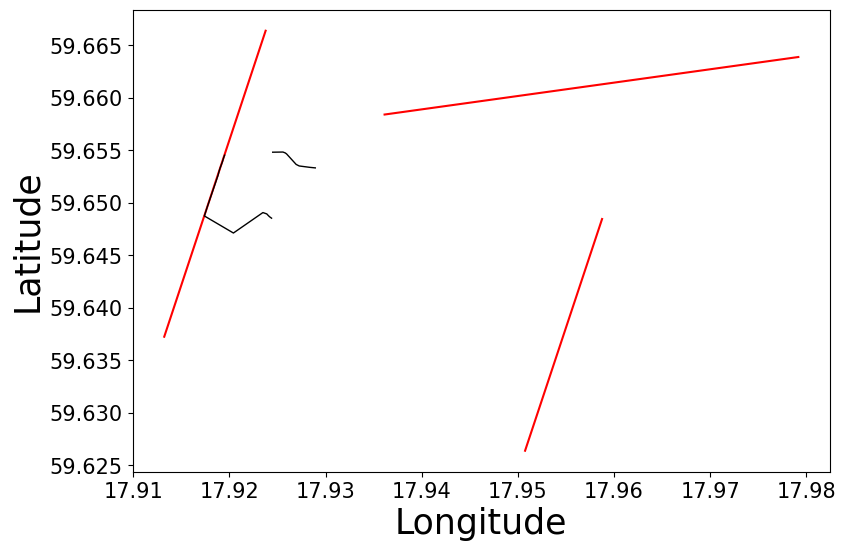

In [8]:
two_df = pd.DataFrame()
two_df = two_df.append(ground_departures_df.loc['EWG2J'])
two_df = two_df.append(ground_departures_df.loc['SAS142'])

#two_df = ground_departures_df[(ground_departures_df.idx['callsign']=='EWG2J')|(ground_departures_df.idx['callsign']=='SAS142')]
plot_horizontal_profile(two_df)

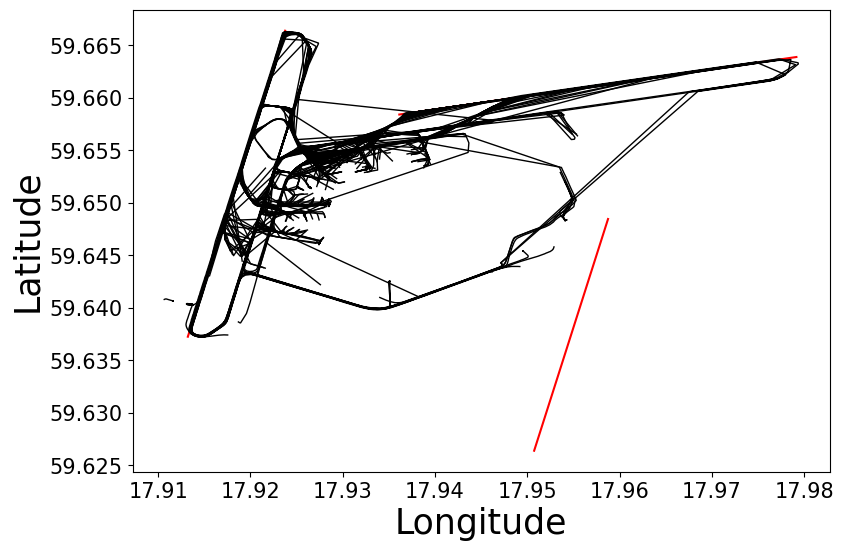

In [9]:
ground_df = ground_flights.data
#print(ground_df.head())
ground_df = ground_df[ground_df['callsign'].notna()]
#print(ground_df.head())
ground_df.set_index(['callsign'], inplace = True, drop=True)
ground_df = ground_df[['longitude', 'latitude']]
#print(ground_df.head())
plot_horizontal_profile(ground_df)

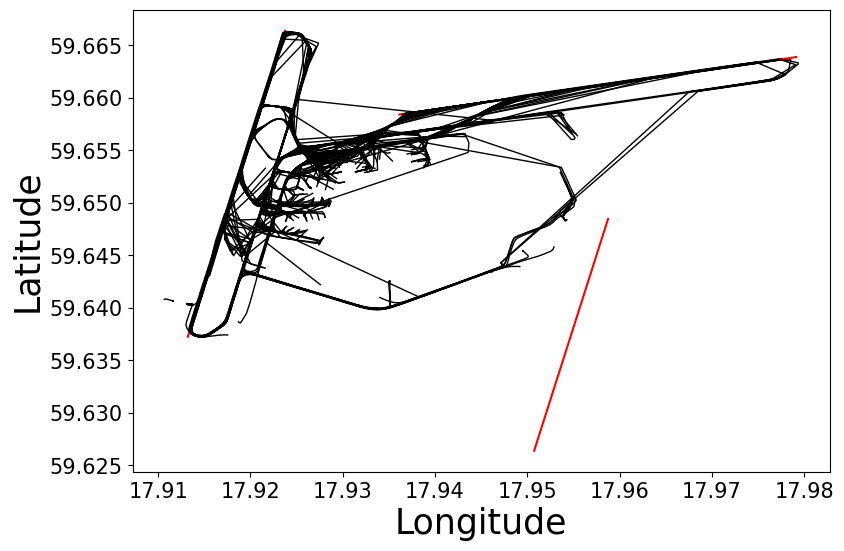

In [10]:
plot_horizontal_profile(ground_departures_df)

/home/anlemett/.local/lib/python3.8/site-packages/cartes/osm/requests.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


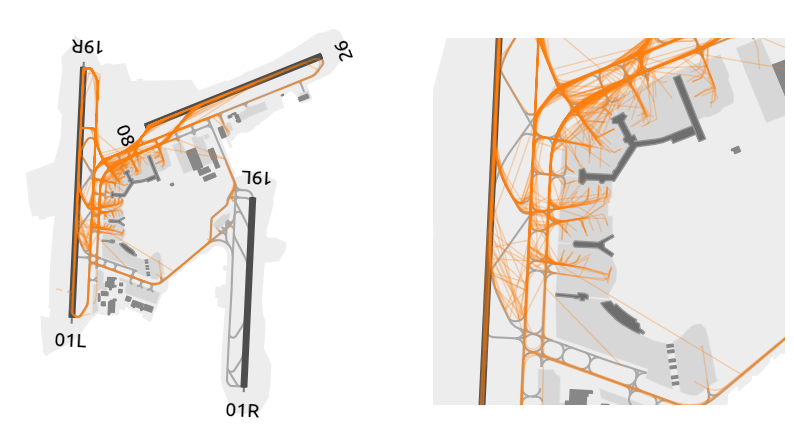

In [11]:
import matplotlib.pyplot as plt
from cartes.crs import EuroPP

with plt.style.context("traffic"):
    fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection=EuroPP()))

    airports['ESSA'].plot(ax[0], labels=dict(fontsize=14, font="Ubuntu"))
    ground_flights.plot(ax[0], alpha=.3, color='tab:orange')
    
    airports['ESSA'].plot(ax[1], )
    ground_flights.plot(ax[1], alpha=.3, color='tab:orange')

    ax[1].set_extent((17.9142, 17.9423, 59.6413, 59.6563))